## Maximum Likelihood Estimation & Hypothesis Testing

#### *9 October 2019*
#### *DATA 1010*

Today we will discuss another technique for obtaining an estimator for a statistical functional. Specifically, we will learn a technique to obtain a PDF or PMF that is the most compatible with the observed data, in a sense that we will make precise. This approach relies on searching for a distribution in a specific parametric family of distributions, so it is fundamentally a parametric method. 

## Maximum Likelihood Estimation (MLE)

Given observations $(x_1,\cdots,x_n)$, our objective is to find parameter(s) $\theta$ such that the function $f(x; \theta)$ best explains the observed data. We find $\theta$ by maximizing the log-likelihood:

$$ \hat{\theta} = \operatorname{argmax}_{\theta} \log(\mathcal{L}_x(\theta)) = \operatorname{argmax}_{\theta} \sum_{i=1}^n \log(f(x_i,\theta)).$$

The idea is that it's generally better if the density is large, rather than small, at the observed points. 

In [1]:
import Pkg; Pkg.add("LaTeXStrings")
using Plots, LaTeXStrings, StatsBase

 Resolving package versions...
  Updating `/opt/julia/environments/v1.2/Project.toml`
 [no changes]
  Updating `/opt/julia/environments/v1.2/Manifest.toml`
 [no changes]


## Problem 1 - Simple MLE at Discrete Case

A certain medical test has the following properties: If the person has a disease, it gives a positive response with 90% probability. If a person does not, it gives a positive response with 5% probability.  Let $X = 1$ indicate a positive result from the test; $X = 0$, a negative result. Whether a person actually has the disease is indicated by an unknown parameter $\theta$: if $\theta$ exceeds $0.5$, a person has the disease, and a person does not have the disease if $\theta \leq 0.5$. Suppose that the parameter space is $\Theta = \{0.2, 0.8\}$. 

(a) Identify the distribution of $X$, in terms of $\theta$.

(b) Suppose we observe $X = 0$. Give the maximum likelihood estimate of $\theta$.

(c) Suppose we observe $X = 1$. Give the maximum likelihood estimate of $\theta$.

(d) In what way does this exercise highlight a shortcoming of maximum likelihood estimation?

![](images/0.PNG)

![](images/1.PNG)

*Solution:*  
(a). If $\theta$ = 0.2, then $P(X=1) = 0.05, P(X=0) = 0.95$  
     If $\theta$ = 0.8, then $P(X=1) = 0.9, P(X=0) = 0.1$  
(b). If X=0, then the MLE is $\theta$ = 0.2  
(c). If X=1, then the MLE is $\theta$ = 0.8  
(d). Bayes' Thm tells us what the prior prob of $\theta=0.2$ and $\theta=0.8$ matter

---

## Problem 2 - Smart way of finding MLE of Binomial Distribution

Consider the binomial distribution with parameters $(n,p)$ (the sum of Bernoulli random variables with probability $p$). It has probability distribution 

$$\mathbb{P}(X = k | p) = \left(\begin{array}{c}n\\ k\end{array}\right) p ^ k (1 - p)^{n - k}.$$

Compute the maximum likelihood estimator for $p$ without taking derivatives. Instead use the close relationship between the binomial distribution and the Bernoulli distribution (whose MLE was discussed in Data Gymnasia). 

![](images/2.PNG)

---

## Problem 3 - Sometimes MLE does not exist

Consider a distribution modified slightly from the uniform distribution $\operatorname{Unif}(0,b)$:

$$f_b(x) = \begin{cases} \frac 1b \ \ \ &&\text{if $x \in (0,b)$}, \\ 0 \ \ \ &&\text{else} \end{cases}$$

In other words, we do not include the endpoints of the interval. Show that the MLE for $b$ does not exist for this distribution.

![](images/2a.PNG)

![](images/3.PNG)

---

## Problem 4 - Invariant Property of MLE (if you want MLE of a function of an estimator, you just apply that function to the MLE)

Find the MLE for $\theta^4$ for a set of observations drawn from $\mathcal{N}(\theta, \sigma^2)$, where $\theta$ is the only unknown parameter.

Note: the maximum likelihood estimator is **invariant**, meaning that if the MLE of $\theta$ exists and equals $\widehat{\theta}$, then the MLE for $g(\theta)$ is $g(\widehat{\theta})$ (where $g$ is any function). 

*Solution:*  
The maximum likelihood estimator of $\theta^4$ is the sample mean to the fourth power, by invariance of MLE.

# Problem 5 (Challenge) - Mixed Gaussian with 4 unknown parameters

Consider the six-parameter family

$$
\pi_1 f_{\mu_1, \sigma_1}(x) + \pi_2 f_{\mu_2, \sigma_2}(x), 
$$

where $f_{\mu, \sigma}$ denotes the normal density function with mean $\mu$ and standard deviation $\sigma$.

Our goal will be to find the MLE.

(a) Explain what happens when you try to find the MLE analytically. 

(b) Try finding the MLE numerically instead, using the `Optim` package.

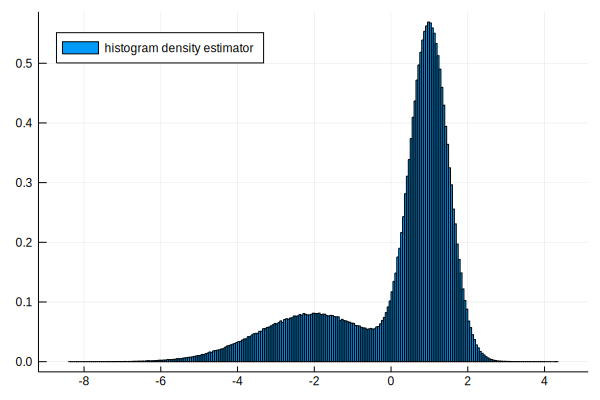

In [2]:
function observation()
    if rand() < 0.3 #0.3 is the propotion, correspond to pi1
        -2 + 1.5randn()
    else
        1 + 0.5randn()
    end
end

histogram([observation() for _ in 1:1_000_000], normed = true, label = "histogram density estimator", legend = :topleft)

In [3]:
observations = [observation() for _ in 1:100]; 

In [4]:
# numerical minimize the log likelihood

---

## Hypothesis Testing

![](images/3a.PNG)

## Problem 6 - CDF of Normal Distribution

Consider the standard normal distribution $\mathcal{N}(0, 1)$.

a) Identify an interval which is symmetric about zero and which contains 95% of the probability mass of the normal distribution. Hint: use the `quantile` function from `Distributions`. 

b) Are there other intervals with total probability mass equal to 0.95?

c) The amount of probability mass in $(-\infty, 1.6449]$ (for the distribution $\mathcal{N}(0,1)$) is $0.95$. Give a reason why one might use the symmetric interval, rather than this one, for purposes of hypothesis testing. 

*Solutions:*  
(a)

![](images/4.PNG)

In [5]:
using Distributions
left = quantile(Normal(0,1),0.05/2)
right = quantile(Normal(0,1),1-0.05/2)
print(left, right)

-1.95996398454005921.9599639845400576

(b)

![](images/4a.PNG)

Note: 以左边的点为基准

![](images/4b.PNG)

In [6]:
quantile(Normal(0,1),0.05)

-1.6448536269514724

Ans: Yes, one interval for each left endpoint b/w $-\infty$ and $-1.64$

(c). Symmetric interval is the shortest one

---

## Problem 7

a) Consider the hypothesis that a coin is fair, with the alternative hypothesis that the coin is not fair. We flip it 4 times, and it turns up heads thrice. Show that we fail to reject the null hypothesis that the coin is fair. 

b) Consider the hypothesis that a coin is fair, with the alternative hypothesis that the coin is not fair. We flip it 40 times, and it turns up heads 30 times. Use the Wald test to show that we should reject the null hypothesis that the coin is fair (at a 5% significance level). 

c) Consider the hypothesis that a coin is fair, with the alternative hypothesis that the coin is biased in favor of heads. We flip it 40 times, and it turns up heads 30 times. Use the Wald test to show that we should reject the null hypothesis that the coin is fair (at a 5% significance level). Is the rejection region the same for this test? 


*Solution:*  
(a)

![](images/5.PNG)

(b)

![](images/6.PNG)

One thing can't do: set alternative into something not the negation of null

![](images/6a.PNG)

# Problem 8 - Wald Test and T Test

When we apply the normal approximation with an *estimated* variance value, we are cheating somewhat. For relatively small sample sizes (the standard rule of thumb being 30 or less), we should should apply a correction. 

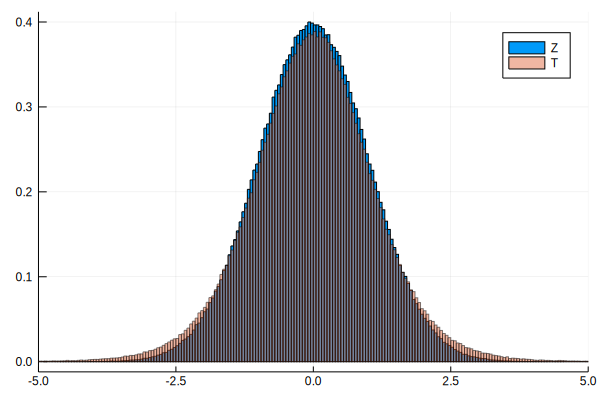

In [7]:
function t_score(n)
    observations = rand(Normal(3, 2), n)
    √(n) * (mean(observations) - 3)/std(observations)
end

function z_score(n)
    observations = rand(Normal(3, 2), n)
    √(n) * (mean(observations) - 3)/2
end

n = 10 # when n is big, the t distribution is closer to the Z distribution
histogram([z_score(n) for _ in 1:1_000_000], label = "Z", normed = true)
histogram!([t_score(n) for _ in 1:1_000_000], label = "T", normed = true, xlims = (-5,5), opacity = 0.5)

The distribution of $\frac{\bar{X}_n - \mu}{S_n/\sqrt{n}}$, where $\bar{X}_n$ and $S_n$ are the sample mean and sample variance of $n$ independent standard normal random variables, is called the **t-distribution** with $n-1$ degrees of freedom. We can refine the Wald test by simply replacing the normal distribution with the appropriate t-distribution. 

Let's revisit a problem from October 4. We define the confidence interval function based on the normal approximation: 

In [8]:
function confidence_interval_mean_wald(X)
    μ, σ, n = mean(X), std(X), length(X)
    [μ - 1.96σ/√(n), μ + 1.96σ/√(n)]
end

confidence_interval_mean_wald (generic function with 1 method)

We found that the resulting confidence interval fails to deliver as promised: 

In [9]:
# The original is about 0.92 because T distribution is bigger than Z distribution at the tail
function traps_mean(confidence_interval, D, n)
    sample = rand(D,n)
    a,b = confidence_interval(sample)
    μ = mean(D)
    a ≤ μ ≤ b
end

mean(traps_mean(confidence_interval_mean_wald, Normal(3, 2), 10) for _ in 1:1_000_000)

0.918323

Modify `confidence_interval_mean` so that it uses the appropriate t-distribution value. Show that the resulting confidence interval is well-calibrated.

In [10]:
# TDist(ν) represents a t-distribution with ν degrees of freedom
function confidence_interval_mean_t(X)
    μ, σ, n = mean(X), std(X), length(X)
    t_critical = quantile(TDist(n-1),97.5/100)
    [μ - t_critical*σ/√(n), μ + t_critical*σ/√(n)]
end

mean(traps_mean(confidence_interval_mean_t, Normal(3, 2), 10) for _ in 1:1_000_000)

0.950053

---

## Problem 9 - Welch's t test

This problem explores one of the most typical settings in which we use t-tests.

From two clinical trials we observe the following peak sprint duration in seconds: 

Population A: $n_1 = 50; \bar{Y}_1 = 7.6; S_1^2 = 1.8$;

Population B: $n_2 = 47; \bar{Y}_2 = 6.9; S_2^2 = 1.4$.

Use Welch's t-test to test the hypothesis that the means for the two groups are equal (note: you can find Welch's t-test in Data Gymnasia). 

In [11]:
# Welch's t-test:

Y1, v1, n1 = 7.6, 1.8, 50
Y2, v2, n2 = 6.9, 1.4, 47

ν = (v1/n1 + v2/n2)^2 / ((v1/n1)^2/(n1-1) + (v2/n2)^2/(n2-1)) # degree of freedom

t_crit = quantile(TDist(ν),0.975)
T = (Y1 - Y2)/sqrt(v1/n1 + v2/n2) # test statistics 


2.7291488705396603

# Problem 10

The sum of the squares of $k$ independent standard normal random variables has a distribution which is called the $\chi^2$ distribution.

In [11]:
plot(0:0.1:40, x-> pdf(Chisq(10), x), fillrange = 0, fillopacity = 0.4, label = L"\chi^2")

UndefVarError: UndefVarError: Chisq not defined

Suppose you have a random variable taking values in a finite set, let's say $\{1,2,3\}$. Suppose further that you want to test the hypothesis that the probabilities associated with the three values are $1/4, 1/4$ and $1/2$, respectively. Suppose you draw $n$ independent observations from the distribution on $\{1,2,3\}$ and come up with $N_1$, $N_2$, and $N_3$ ones, twos, and threes, respectively. 

Pearson's χ² test says that $T = \frac{(N_1 - n/4)^2}{n/4} + \frac{(N_2 - n/4)^2}{n/4} + \frac{(N_3 - n/2)^2}{n/2}$ is approximately χ²-distributed with 2 degrees of freedom. Generate some data with the appropriate probabilities and check that you usually do not reject the null hypothesis (that the probabilities are 1/4, 1/4, 1/2) for those data. Generate some data with quite different probabilites and show that you usually do reject the null hypothesis (when $n$ is not very small).

In [12]:
N(n) = DiscreteNonParametric([1,2,3],[1/4,1/4,1/2]) |> # piping: x |> f is the same as f(x)
        D -> rand(D,n) |> # sample n times
        countmap |> # tally
        sort |> # put the tally dictionary in order
        values |> # extract the values
        collect # convert value iterator to an array

N (generic function with 1 method)

In [13]:
nv = [n/4, n/4, n/2]
histogram([sum((N(50) .- nv).^2 ./ nv) for _ in 1:500_000], 
           normed = true, bins = 50, label = L"T")
plot!(0:0.1:40, x-> pdf(Chisq(2), x), fillrange = 0, 
      fillopacity = 0.4, label = L"\chi^2_2")

UndefVarError: UndefVarError: DiscreteNonParametric not defined